## Simple Linear Regression

In [142]:
# importing basic libraries

import numpy as np

import pandas as pd

from pandas import Series, DataFrame

from sklearn.model_selection import train_test_split

#import test and train file

train = pd.read_csv('E:/Study/ML/StatQuest/StatQuest/Regularization-Ridge-Lasso-ElasticNet/Training.csv')
test = pd.read_csv('E:/Study/ML/StatQuest/StatQuest/Regularization-Ridge-Lasso-ElasticNet/Test.csv')

# importing linear regressionfrom sklearn

from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

# splitting into training and cv for cross validation

X = train.loc[:,['Outlet_Establishment_Year','Item_MRP']]

x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales)

# training the model

lreg.fit(x_train,y_train)

# predicting on cv

pred = lreg.predict(x_cv)

# calculating mse

mse = np.mean((pred - y_cv)**2)
mse

2002651.241807601

In [143]:
# calculating coefficients

coeff = DataFrame(x_train.columns)

coeff['Coefficient Estimate'] = Series(lreg.coef_)

coeff

,0,Coefficient Estimate
0,Outlet_Establishment_Year,-10.199242
1,Item_MRP,15.520423


In [144]:
lreg.score(x_cv,y_cv)

0.3233954421430756

## Multiple Linear Regression

In [145]:
train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True)
X = train.loc[:,['Outlet_Establishment_Year','Item_MRP','Item_Weight']]

#splitting into training and cv for cross validation

x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales)
counter_nan_train = X.isnull().sum()

## training the model
print(counter_nan_train)
lreg.fit(x_train,y_train)

pred = lreg.predict(x_cv)

Outlet_Establishment_Year    0
Item_MRP                     0
Item_Weight                  0
dtype: int64


In [146]:
mse = np.mean((pred - y_cv)**2)
print(mse)

#1853431.59

## calculating coefficients

coeff = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
print(coeff)

1939160.0086960865
                           0  Coefficient Estimate
0  Outlet_Establishment_Year            -12.107604
1                   Item_MRP             15.378689
2                Item_Weight              2.551882


In [147]:
print("RScore",lreg.score(x_cv,y_cv))#0.32942
print("Adjusted R^2 ",1 - (1-lreg.score(x_cv, y_cv))*(len(y_cv)-1)/(len(y_cv)-x_cv.shape[1]-1))

RScore 0.33431081454186795
Adjusted R^2  0.3333719017273995


In [148]:
# imputing missing values
train = pd.read_csv('E:/Study/ML/StatQuest/StatQuest/Regularization-Ridge-Lasso-ElasticNet/Training.csv')
train['Item_Visibility'] = train['Item_Visibility'].replace(0,np.mean(train['Item_Visibility']))

train['Outlet_Establishment_Year'] = 2013 - train['Outlet_Establishment_Year']

train['Outlet_Size'].fillna('Small',inplace=True)

# creating dummy variables to convert categorical into numeric values
print(train.shape)
mylist = list(train.select_dtypes(include=['object']).columns)
print(mylist)
dummies = pd.get_dummies(train[mylist], prefix= mylist)
#print(dummies)
train.drop(mylist, axis=1, inplace = True)
print(train.shape)
X = pd.concat([train,dummies], axis =1 )
X.shape

(8523, 12)
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
(8523, 5)


(8523, 1605)

In [149]:
X = X.drop('Item_Outlet_Sales',1)

In [150]:
X.shape

(8523, 1604)

In [151]:
print(X.shape)
X.fillna(X.mean(),inplace = True)
print(X.shape)
x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales, test_size =0.3)

# training a linear regression model on train
print(x_train)
lreg.fit(x_train,y_train)

# predicting on cv

pred_cv = lreg.predict(x_cv)

# calculating mse

mse = np.mean((pred_cv - y_cv)**2)

print(mse)

#1348171.96

# evaluation using r-square

print(lreg.score(x_cv,y_cv))

#0.54831541460870059

(8523, 1604)
(8523, 1604)
      Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
6871    12.857645         0.116794   41.0112                         28   
1757     7.050000         0.055559  224.7088                         16   
527     12.857645         0.160179  160.2894                         28   
8362    12.857645         0.026440  143.6470                         28   
7057    12.857645         0.056192  103.1648                         28   
3285     6.630000         0.010937   55.8588                          9   
7342    13.800000         0.014793   88.5172                          4   
2251    12.857645         0.303743  196.0110                         28   
626     19.000000         0.065901  188.7214                          4   
8307    20.200000         0.066066   61.3510                         11   
2050    12.857645         0.005935   98.8358                         28   
8399    13.150000         0.094451  141.4812                         15   

1.6793856634602247e+22
-5768254672211284.0


Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Identifier_DRA12',
       'Item_Identifier_DRA24', 'Item_Identifier_DRA59',
       'Item_Identifier_DRB01', 'Item_Identifier_DRB13',
       'Item_Identifier_DRB24',
       ...
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object', length=1604)
Outlet_Size_Medium              -2.567958e+13
Outlet_Identifier_OUT010        -1.765853e+13
Outlet_Size_High                -1.541249e+13
Outlet_Identifier_OUT019        -1.414740e+13
Outlet_Size_Small               -9.948791e+12
Outlet_Identifier_OUT013        -7.041000e+12
Outlet_Identifier_OUT046        -4.474401e+12
Outlet_Location_Type_Tier 2     -3.366366e+12
Outlet

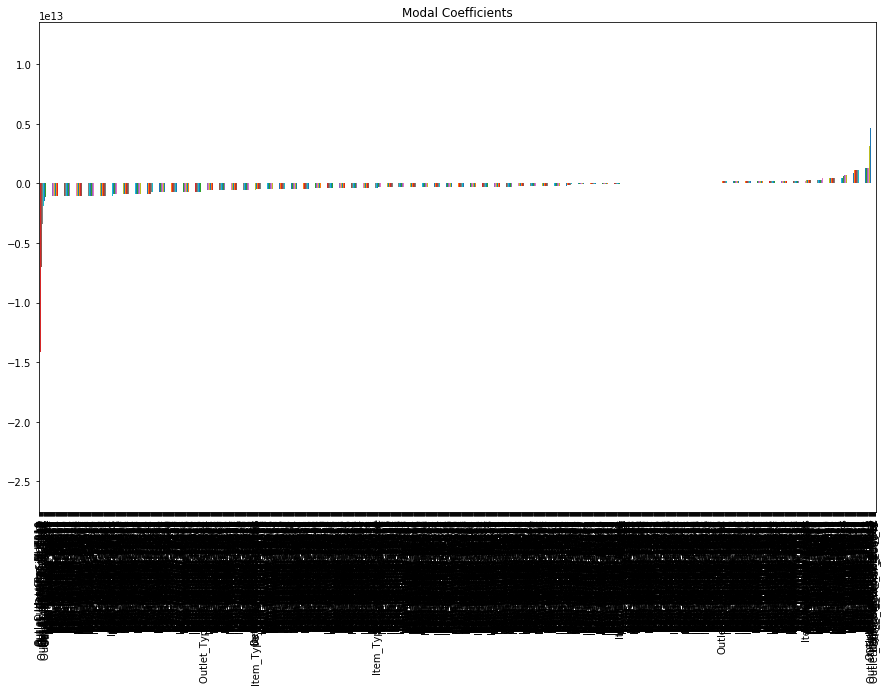

In [156]:
#checking the magnitude of coefficients
predictors = x_train.columns
print(predictors)
coef = Series(lreg.coef_,predictors).sort_values()
print(coef)
plt.figure(figsize=(15,9))
coef.plot(kind='bar', title='Modal Coefficients')

In [153]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_cv)

#calculating mse

mse = np.mean((pred_cv - y_cv)**2)

mse 
#1348171.96 ## calculating score ridgeReg.score(x_cv,y_cv) 0.5691

1.6793856634602247e+22

In [154]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.3, normalize=True)

lassoReg.fit(x_train,y_train)

pred = lassoReg.predict(x_cv)

# calculating mse

mse = np.mean((pred_cv - y_cv)**2)

mse

1346205.82

lassoReg.score(x_cv,y_cv)

0.5720

0.572

In [155]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)

ENreg.fit(x_train,y_train)

pred_cv = ENreg.predict(x_cv)

#calculating mse

mse = np.mean((pred_cv - y_cv)**2)

print(mse )
#1773750.73

ENreg.score(x_cv,y_cv)

#0.4504

1558716.0263580263


0.46462142691125624